In [25]:
import os
import pathlib

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Data reading

In [21]:
class PrintDatabase:
	def __init__(self, base):
		self.base = pathlib.Path(base)

	def __iter__(self):
		for user in self.base.iterdir():
			for fp in user.iterdir():
				yield cv.imread(str(fp), cv.IMREAD_GRAYSCALE)

In [22]:
from itertools import islice
db = PrintDatabase("BaseDatosNISTsd09_pr")
five_prints = list(islice(db, 5))
five_prints[0].shape

(768, 832)

# Preprocessing

In [28]:
def divide_image_into_chunks(image, chunk_size=16):
	chunks = []
	for i, y in enumerate(range(0, image.shape[0], chunk_size)):
		for j, x in enumerate(range(0, image.shape[1], chunk_size)):
			chunk = image[y:y+chunk_size, x:x+chunk_size]
			chunks.append(((j, i), chunk))
	return chunks


In [34]:
chunks = divide_image_into_chunks(five_prints[0])

cv.calcHist(chunks[0][1], 1, 0, 1, 1)

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'calcHist'
> Overload resolution failed:
>  - Can't parse 'channels'. Input argument doesn't provide sequence protocol
>  - Can't parse 'channels'. Input argument doesn't provide sequence protocol


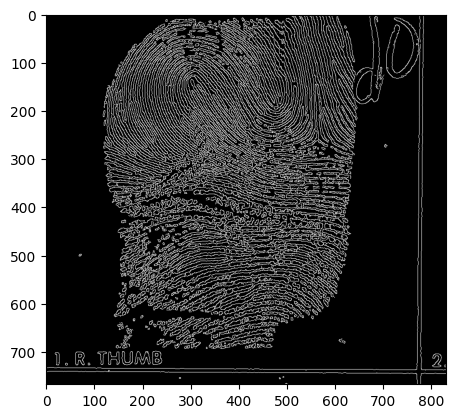

In [27]:
plt.imshow(cv.Canny(five_prints[0], 100, 200), cmap='gray')